<a href="https://colab.research.google.com/github/Nutsudapenpong/DPDM/blob/master/trymydatawithconv2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf

import cv2
import os
import glob
import numpy as np

In [93]:
labels = ['Mif', 'Ov', 'Artifact']
img_size = 224
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path,img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)


In [88]:
from google.colab import drive
drive.mount('/content/drive')  

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [94]:
#Now we can easily fetch our train and validation data.
train = get_data('/content/drive/My Drive/Ascaris/Train')
val = get_data('/content/drive/My Drive/Ascaris/Test')

'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  from ipykernel import kernelapp as app


'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable


In [96]:
train

array([[array([[[169, 142,  97],
        [167, 144,  92],
        [172, 145,  98],
        ...,
        [190, 187, 198],
        [199, 193, 205],
        [194, 191, 202]],

       [[169, 141,  99],
        [170, 143,  98],
        [167, 142,  96],
        ...,
        [196, 190, 201],
        [196, 190, 200],
        [195, 187, 199]],

       [[168, 141,  97],
        [167, 138,  98],
        [165, 138,  95],
        ...,
        [197, 189, 200],
        [196, 188, 201],
        [200, 189, 203]],

       ...,

       [[ 11,  11,   9],
        [ 11,   9,  10],
        [ 11,  10,   8],
        ...,
        [ 14,  12,  13],
        [ 14,  12,  13],
        [ 13,  11,  12]],

       [[ 13,  12,  10],
        [ 12,  10,  10],
        [ 11,  10,   8],
        ...,
        [ 13,  11,  12],
        [ 13,  11,  12],
        [ 14,  13,  11]],

       [[ 15,  11,  10],
        [ 11,  10,   8],
        [ 11,  10,   8],
        ...,
        [ 13,  12,  12],
        [ 12,  12,  12],
        [ 12,  1

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


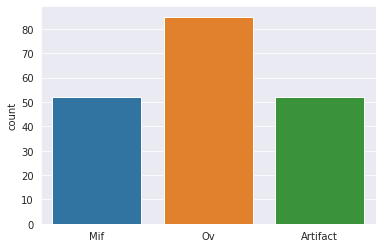

In [99]:
l = []
for i in train:
    if(i[1] == 0):
        l.append("Mif")
    elif(i[1] == 1):
        l.append("Ov")
    else:
        l.append("Artifact")
sns.set_style('darkgrid')
sns.countplot(l)

In [107]:
x_train = []
y_train = []
x_val = []
y_val = []

for feature, label in train:
  x_train.append(feature)
  y_train.append(label)

for feature, label in val:
  x_val.append(feature)
  y_val.append(label)

# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

In [108]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [117]:
model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(224,224,3)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(3, activation="softmax"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 112, 112, 32)      9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 28, 64)       

In [118]:
opt = Adam(lr=0.000001)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [119]:
history = model.fit(x_train,y_train,epochs = 500 , validation_data = (x_val, y_val))

Epoch 1/500


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


6/6 [==============================] - 17s 3s/step - loss: 1.1161 - accuracy: 0.2222 - val_loss: 1.1050 - val_accuracy: 0.3000
Epoch 2/500
6/6 [==============================] - 13s 2s/step - loss: 1.1068 - accuracy: 0.2487 - val_loss: 1.1008 - val_accuracy: 0.3000
Epoch 3/500
6/6 [==============================] - 13s 2s/step - loss: 1.0978 - accuracy: 0.3598 - val_loss: 1.0970 - val_accuracy: 0.2750
Epoch 4/500
6/6 [==============================] - 13s 2s/step - loss: 1.1020 - accuracy: 0.3386 - val_loss: 1.0936 - val_accuracy: 0.3000
Epoch 5/500
6/6 [==============================] - 13s 2s/step - loss: 1.0878 - accuracy: 0.4074 - val_loss: 1.0903 - val_accuracy: 0.4000
Epoch 6/500
6/6 [==============================] - 13s 2s/step - loss: 1.0824 - accuracy: 0.4180 - val_loss: 1.0873 - val_accuracy: 0.4250
Epoch 7/500
6/6 [==============================] - 13s 2s/step - loss: 1.0804 - accuracy: 0.4815 - val_loss: 1.0846 - val_accuracy: 0.4000
Epoch 8/500
6/6 [======================

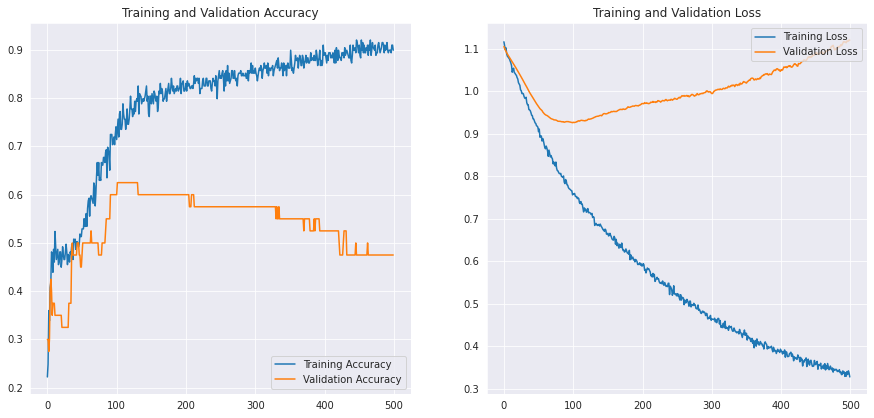

In [120]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(500)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [129]:
#predictions = model.predict_classes(x_val)
predict_x=model.predict(x_val) 
classes_x=np.argmax(predict_x,axis=1)
predictions = classes_x.reshape(1,-1)[0]
print(classification_report(y_val, predictions, target_names = ['Mif (Class 0)','Ov (Class 1)', 'Artifact (Class 2)']))

                    precision    recall  f1-score   support

     Mif (Class 0)       1.00      0.46      0.63        13
      Ov (Class 1)       0.23      0.23      0.23        13
Artifact (Class 2)       0.48      0.71      0.57        14

          accuracy                           0.48        40
         macro avg       0.57      0.47      0.48        40
      weighted avg       0.57      0.47      0.48        40

